In [4]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import numpy as np
from itertools import product
from tqdm import tqdm
import sys
sys.path.append('../src')
from models import open_pickle, filter_terms_not_in_wemodel

In [21]:
we_model_name = "sg_dim300_min100_win5"
we_vector_size = 300
we_model_dir = '../data/external/wiki-english/wiki-english-20171001/%s' % we_model_name

we_model = Word2Vec.load(we_model_dir+'/model.gensim')
print ('loading done!')

loading done!


In [5]:
RESULTS_FILEPATH = '../data/interim/association_metric_exps.pickle'
EXPERIMENT_DEFINITION_FILEPATH = '../data/interim/experiment_definitions.pickle'
IMAGE_SAVE_FILEPATH = '../reports/figures/exp_results.png'
NONRELATIVE_IMAGE_SAVE_FILEPATH = '../reports/figures/nonrelative_exp_results.png'

exp_def_dict = open_pickle(EXPERIMENT_DEFINITION_FILEPATH)
results_dict = open_pickle(RESULTS_FILEPATH)

In [6]:
results_dict[2]['second']

{'X_array': array([0.06205934, 0.09165296, 0.0919002 , 0.11380053, 0.09113181,
        0.11897811, 0.10779971, 0.08894435, 0.11067972, 0.14237365,
        0.09621373, 0.1135487 , 0.14185229, 0.06471875, 0.08086327,
        0.15060195, 0.12328166, 0.13162217, 0.18247157, 0.08507252,
        0.04209799, 0.12344435, 0.08338574, 0.09611011], dtype=float32),
 'Y_array': array([ 0.20805708, -0.08329672, -0.09894511,  0.01462591, -0.12913164,
        -0.04405615, -0.02649808, -0.0268372 ,  0.05020308, -0.01089379,
        -0.04618579, -0.09935915, -0.03268984, -0.01189023, -0.25332013,
        -0.15611374, -0.1442793 , -0.12644878, -0.21717617,  0.0141916 ,
        -0.12324518,  0.01065516,  0.03379461,  0.03538892], dtype=float32),
 'X_mean': 0.105608545,
 'Y_mean': -0.052643776,
 'threshold': 0.0380725,
 'pct_5': 0.006891302671283487,
 'pct_95': 0.557002368569374,
 'A_biases': array([0.5008259 , 0.3699408 , 0.22995502, 0.42247248, 0.3397562 ,
        0.36337355, 0.25808394, 0.32315367, 0.51

In [10]:
def add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label):
    TITLE_FONT_SIZE = 12
    [target_label, A_label, B_label] = [s.upper() for s in [target_label, A_label, B_label]]
    ax.set_title(f'#{exp_num}: {target_label} terms: {B_label} (left) vs. {A_label} (right)',
                fontsize=TITLE_FONT_SIZE)
    ax.set_xlabel(f'Bias Value')
    ax.set_ylabel(f'Word')
    ax.yaxis.set_ticklabels([])

In [9]:
def annotate_points(ax, terms, x_array, y):
    POINT_FONT_SIZE = 9
    for i, txt in enumerate(terms):
        ax.annotate(txt, (x_array[i], y[i]), fontsize=POINT_FONT_SIZE)

In [12]:
def add_scatters_and_lines(ax, arr_first, arr_second, threshold_first, threshold_second,
                   mean_first, mean_second, pct_5_second, pct_95_second, lower_bound, upper_bound, y):
    S = 20 # Marker size
    ZERO_LINE_COLOR = 'lime'
    FIRST_ORDER_COLOR = 'black'
    SECOND_ORDER_COLOR = 'red'
    SECOND_ORDER_PERCENTILES_COLOR = 'blue'
    SHADE_DARKNESS = 0.2
    XAXIS_LIMIT = 0.6
    
    y = [i for i in range(1,len(arr_first)+1)]
    #ax.scatter(arr_first, y, c=FIRST_ORDER_COLOR, s=S)
    ax.scatter(arr_second, y, c=SECOND_ORDER_COLOR, s=S)
    ax.xaxis.grid()
    #ax.axvline(threshold_first, c=FIRST_ORDER_COLOR, linestyle='-.',label='first-order threshold')
    ax.axvline(threshold_second, color=SECOND_ORDER_COLOR, linestyle='-.', label='second-order threshold')
    #ax.axvline(-threshold_first, c=FIRST_ORDER_COLOR, linestyle='-.')
    ax.axvline(-threshold_second, color=SECOND_ORDER_COLOR, linestyle='-.')
    #ax.axvline(mean_first, c=FIRST_ORDER_COLOR, label='first-order mean')
    #ax.axvline(mean_second, c=SECOND_ORDER_COLOR, label='second-order mean')
    ax.axvspan(lower_bound, upper_bound, alpha=SHADE_DARKNESS, color=SECOND_ORDER_PERCENTILES_COLOR)
    #ax.axvspan(pct_5_second, pct_95_second, alpha=SHADE_DARKNESS, color=SECOND_ORDER_PERCENTILES_COLOR)
    #ax.axvspan(-threshold_first, threshold_first, alpha=SHADE_DARKNESS, color='black')
    ax.set_xlim(-XAXIS_LIMIT, XAXIS_LIMIT)

In [ ]:
fig, axs = plt.subplots(10,2, figsize=(15,50))
LEGEND_SIZE = 10

exps = range(1,11)
target_letters = ['X','Y']
for exp_num, target_letter in tqdm(product(exps, target_letters), total=20):
    col = 0 if target_letter =='X' else 1
    ax = axs[exp_num-1, col]
    
    arr_first = results_dict[exp_num]['first'][f'{target_letter}_array']
    arr_second = results_dict[exp_num]['second'][f'{target_letter}_array']
    threshold_first = results_dict[exp_num]['first']['threshold']
    threshold_second = results_dict[exp_num]['second']['threshold']
    mean_first = results_dict[exp_num]['first'][f'{target_letter}_mean']
    mean_second = results_dict[exp_num]['second'][f'{target_letter}_mean']
    pct_5_second = results_dict[exp_num]['second']['pct_5']
    pct_95_second = results_dict[exp_num]['second']['pct_95']
    lower_bound = results_dict[exp_num]['second']['lower_bound']
    upper_bound = results_dict[exp_num]['second']['upper_bound']
    y = [i for i in range(1,len(arr_first)+1)]
    print(arr_first)
    
    terms = exp_def_dict[exp_num][f'{target_letter}_terms']
    target_label = exp_def_dict[exp_num][f'{target_letter}_label']
    A_label = exp_def_dict[exp_num]['A_label']
    B_label = exp_def_dict[exp_num]['B_label']
    
    
    add_scatters_and_lines(ax, arr_first, arr_second, threshold_first, threshold_second,
                    mean_first, mean_second, pct_5_second, pct_95_second, lower_bound, upper_bound, y)
    annotate_points(ax, terms, arr_first, y)
    add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label)
axs[0,0].legend(loc=2, prop={'size': LEGEND_SIZE})
fig.tight_layout(pad=2)
print('Rendering...')
plt.savefig(IMAGE_SAVE_FILEPATH)
plt.show()

1. (Target groups) are/are not biased overall compared to randomly selected words (shown today)
2. 

In [26]:
from prettytable import PrettyTable
t = PrettyTable()
t.field_names = ['Exp Num', 'Target Labels', 'Attribute Labels']
print(len(exp_def_dict))
for i in range(1, len(exp_def_dict)+1):
    print(i)
    t.add_row([i, exp_def_dict[i]['X_label'] + ' vs. ' + exp_def_dict[i]['Y_label'], exp_def_dict[i]['A_label'] + ' vs. ' + exp_def_dict[i]['B_label']])
print(t)

10
1
2
3
4
5
6
7
8
9
10
+---------+-------------------------------------+-----------------------------+
| Exp Num |            Target Labels            |       Attribute Labels      |
+---------+-------------------------------------+-----------------------------+
|    1    |         Flowers vs. Insects         |   Pleasant vs. Unpleasant   |
|    2    |       Instruments vs. Weapons       |   Pleasant vs. Unpleasant   |
|    3    |    Eur-Am Names vs. Afr-Am Names    |   Pleasant vs. Unpleasant   |
|    4    |    Eur-Am Names vs. Afr-Am Names    |   Pleasant vs. Unpleasant   |
|    5    |    Eur-Am Names vs. Afr-Am Names    |   Pleasant vs. Unpleasant   |
|    6    |     Male Names vs. Female Names     |      Career vs. Family      |
|    7    |            Math vs. Arts            | Male Terms vs. Female Terms |
|    8    |           Science vs. Arts          | Male Terms vs. Female Terms |
|    9    | Mental Disease vs. Physical Disease |   Temporary vs. Permanent   |
|    10   |     

# Non-relative Biases

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

[0.24636367 0.3360326  0.32783392 0.34475553 0.2964261  0.3219602
 0.42715466 0.33073768 0.37278342 0.42416668 0.3732654  0.21366799
 0.2673483  0.22172835 0.2853265  0.36145395 0.2938422  0.33583495
 0.22876093 0.31422225 0.36241674 0.30265492 0.39434937 0.28584054]
[0.24636367 0.3360326  0.32783392 0.34475553 0.2964261  0.3219602
 0.42715466 0.33073768 0.37278342 0.42416668 0.3732654  0.21366799
 0.2673483  0.22172835 0.2853265  0.36145395 0.2938422  0.33583495
 0.22876093 0.31422225 0.36241674 0.30265492 0.39434937 0.28584054]
[0.5008259  0.3699408  0.22995502 0.42247248 0.3397562  0.36337355
 0.25808394 0.32315367 0.5109651  0.29766297 0.44996813 0.44024473
 0.26912582 0.28023386 0.37395474 0.25299838 0.42247367 0.31099528
 0.3073465  0.385985   0.38600868 0.3566254  0.36788228 0.36334863]
[0.5008259  0.3699408  0.22995502 0.42247248 0.3397562  0.36337355
 0.25808394 0.32315367 0.5109651  0.29766297 0.44996813 0.44024473
 0.26912582 0.28023386 0.37395474 0.25299838 0.42247367 0.310

 25%|████████████████████▊                                                              | 5/20 [00:00<00:00, 49.91it/s]

[0.3944222  0.26990762 0.28146312 0.47441512 0.3927817  0.49069777
 0.46628323 0.34994268 0.43958095 0.32065752 0.43984947 0.23892266
 0.3690727  0.27333748 0.42441815 0.43523824 0.4423973  0.33516216
 0.28316173 0.3166422  0.3386161  0.36511853 0.40333164 0.36265072
 0.2976037  0.59314895 0.39043984 0.3308103  0.39909887 0.47525346
 0.46842024 0.32840914 0.4123957 ]
[0.4401426  0.40758857 0.39300704 0.422548   0.42401835 0.47288808
 0.37853423 0.27150398 0.33997792 0.51093006 0.40840536 0.46864495
 0.2940263  0.37291706 0.40625712 0.35360318 0.39283547]
[0.4401426  0.40758857 0.39300704 0.422548   0.42401835 0.47288808
 0.37853423 0.27150398 0.33997792 0.51093006 0.40840536 0.46864495
 0.2940263  0.37291706 0.40625712 0.35360318 0.39283547]
[0.41043445 0.36410475 0.3952404  0.3842376  0.38454098 0.40792322
 0.33905107 0.26729876 0.3341636  0.47874033 0.33722147 0.46421722
 0.22351082 0.33408272 0.38915044 0.31203657 0.40071142]
[0.41043445 0.36410475 0.3952404  0.3842376  0.38454098 0

 50%|█████████████████████████████████████████                                         | 10/20 [00:00<00:00, 48.81it/s]

[0.32131395 0.32361224 0.33565697 0.3402423  0.25615257 0.30759025
 0.34275684 0.308491  ]
[0.32131395 0.32361224 0.33565697 0.3402423  0.25615257 0.30759025
 0.34275684 0.308491  ]
[0.38380632 0.36233315 0.37253574 0.37974787 0.3501494  0.26110104
 0.42578775 0.33504853]
[0.38380632 0.36233315 0.37253574 0.37974787 0.3501494  0.26110104
 0.42578775 0.33504853]
[0.35381776 0.3435467  0.32874483 0.28977275 0.36788458 0.30623388
 0.2475726  0.35016537]
[0.35381776 0.3435467  0.32874483 0.28977275 0.36788458 0.30623388
 0.2475726  0.35016537]


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:00<00:00, 49.44it/s]

[0.38893095 0.4691456  0.24035197 0.3165167  0.2876688  0.22467521]
[0.38893095 0.4691456  0.24035197 0.3165167  0.2876688  0.22467521]
[0.48986107 0.43047255 0.45799017 0.43227124 0.38485655 0.29719067
 0.33924606 0.38555047]
[0.48986107 0.43047255 0.45799017 0.43227124 0.38485655 0.29719067
 0.33924606 0.38555047]


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 49.95it/s]


Rendering...


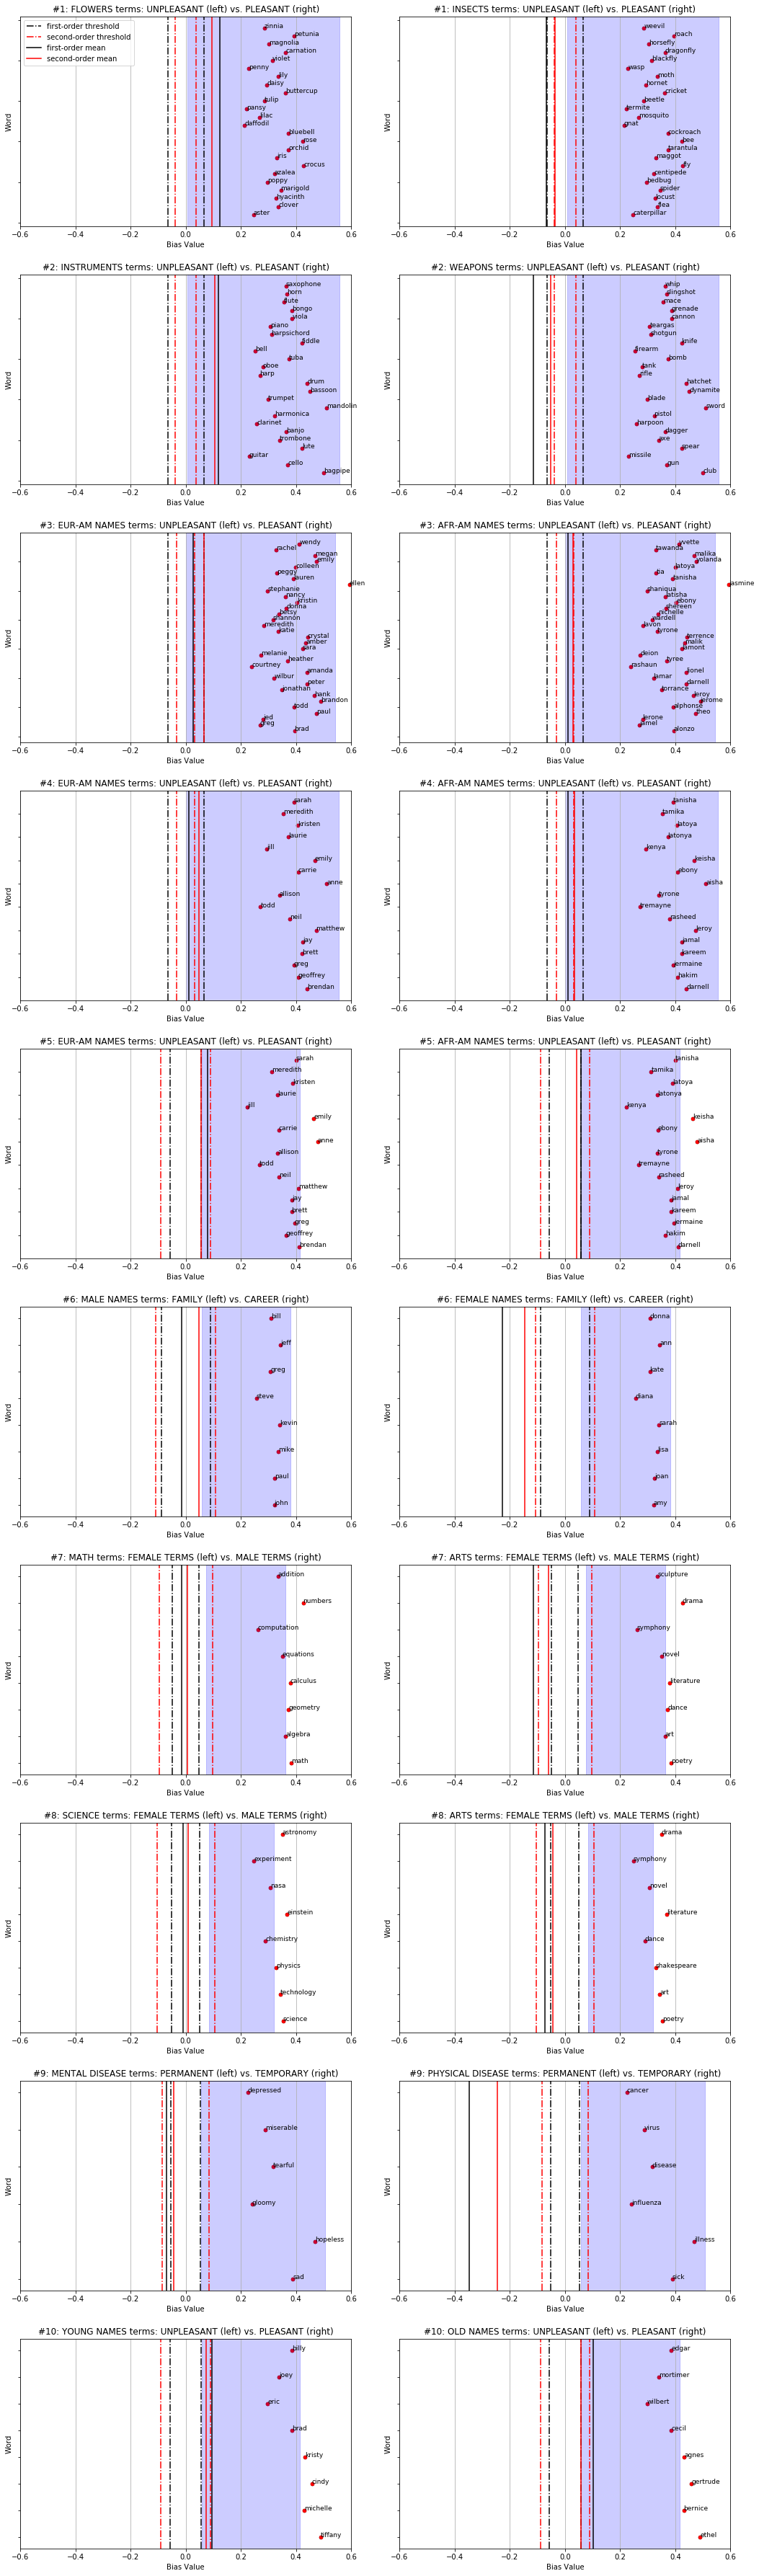

In [39]:
fig, axs = plt.subplots(10,2, figsize=(15,50))
LEGEND_SIZE = 10

exps = range(1,11)
target_letters = ['X','Y']
for exp_num, target_letter in tqdm(product(exps, target_letters), total=20):
    col = 0 if target_letter =='X' else 1
    ax = axs[exp_num-1, col]
    
    #arr_first = results_dict[exp_num]['first'][f'{target_letter}_array']
    #arr_second = results_dict[exp_num]['second'][f'{target_letter}_array']
    arr_first = results_dict[exp_num]['second']['A_biases']
    arr_second = arr_first
    threshold_first = results_dict[exp_num]['first']['threshold']
    threshold_second = results_dict[exp_num]['second']['threshold']
    mean_first = results_dict[exp_num]['first'][f'{target_letter}_mean']
    mean_second = results_dict[exp_num]['second'][f'{target_letter}_mean']
    pct_5_second = results_dict[exp_num]['second']['pct_5']
    pct_95_second = results_dict[exp_num]['second']['pct_95']
    y = [i for i in range(1,len(arr_first)+1)]
    print(arr_first)
    
    terms = exp_def_dict[exp_num][f'{target_letter}_terms']
    target_label = exp_def_dict[exp_num][f'{target_letter}_label']
    A_label = exp_def_dict[exp_num]['A_label']
    B_label = exp_def_dict[exp_num]['B_label']
    
    
    add_scatters_and_lines(ax, arr_first, arr_second, threshold_first, threshold_second,
                    mean_first, mean_second, pct_5_second, pct_95_second, y)
    annotate_points(ax, terms, arr_first, y)
    add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label)
axs[0,0].legend(loc=2, prop={'size': LEGEND_SIZE})
fig.tight_layout(pad=2)
print('Rendering...')
plt.savefig(NONRELATIVE_IMAGE_SAVE_FILEPATH)
plt.show()